# 8.Projections for the Biparite Graphs

In [1]:
import os
import pandas as pd
rdata = pd.read_csv('core-data-train_rating.csv')
rdata.head()

,user_id,recipe_id,rating,dateLastModified
0,5215572,17991,5,2010-08-25T14:38:53.84\n
1,5215572,170724,4,2010-09-09T14:04:45.733\n
2,5215572,18045,5,2010-08-16T14:51:25.833\n
3,3622615,60598,4,2009-03-15T12:10:20.85\n
4,1313770,47519,5,2005-10-04T15:43:36.653\n


In [2]:
import networkx as nx
from networkx import *
import matplotlib.pyplot as plt
 
#Create a graph
G = nx.DiGraph()

#Add nodes
r=list(set(rdata.recipe_id))

u=list(set(rdata.user_id))
G.add_nodes_from(u, bipartite=0)
G.add_nodes_from(r, bipartite=1)
print(is_bipartite(G))
G.add_weighted_edges_from([(uid, rid,rating) for (uid, rid, rating) 
              in rdata[['user_id', 'recipe_id', 'rating']].to_numpy()])
print(G.is_directed())

True
True


In [3]:
print(info(G))

Name: 
Type: DiGraph
Number of nodes: 97667
Number of edges: 676946
Average in degree:   6.9312
Average out degree:   6.9312


In [4]:
print(len(r))

29093


In [5]:
print(u[:5])

[3670017, 131074, 3145730, 1703941, 4456457]


In [6]:
user_graph = nx.algorithms.bipartite.projection.weighted_projected_graph(G,u,ratio=False)

In [32]:
nx.write_edgelist(user_graph,'try_projection_user_graph')

In [10]:
p_1 = nx.read_edgelist("ten_try_projection_user_graph")

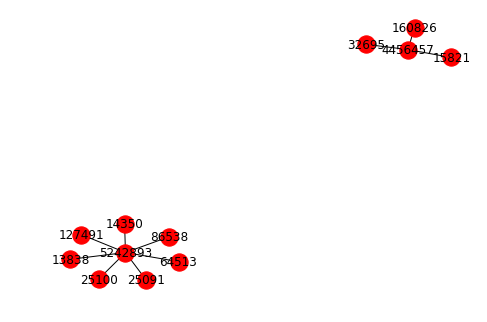

In [8]:
nx.draw(p_1,with_labels=1,with_weights=1)
plt.show()

{('4456457', '160826'): Text(0.0917159,-0.924237,'1'),
 ('4456457', '15821'): Text(-0.018491,-0.88191,'1'),
 ('4456457', '32695'): Text(0.0581118,-0.752513,'1'),
 ('5242893', '64513'): Text(-0.00351071,0.488808,'3'),
 ('5242893', '127491'): Text(0.0411588,0.448973,'3'),
 ('5242893', '25091'): Text(-0.0546468,0.471182,'4'),
 ('5242893', '86538'): Text(0.0306243,0.393839,'4'),
 ('5242893', '25100'): Text(-0.0648986,0.378494,'4'),
 ('5242893', '14350'): Text(-0.0126449,0.362939,'4'),
 ('5242893', '13838'): Text(-0.0826744,0.42751,'4')}

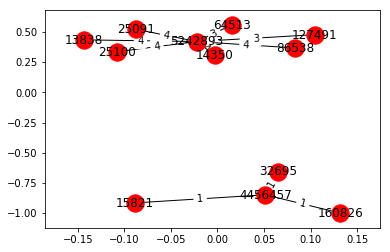

In [11]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(p_1) 
nx.draw_networkx(p_1,pos)
labels = nx.get_edge_attributes(p_1,'weight')
nx.draw_networkx_edge_labels(p_1,pos,edge_labels=labels)

In [23]:
import matplotlib.pyplot as plt

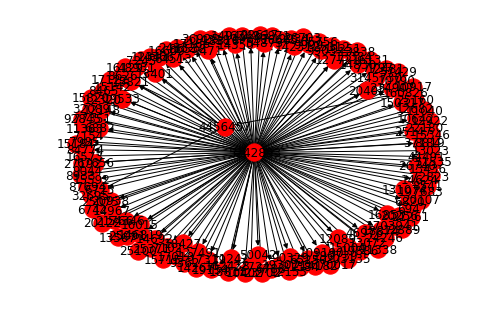

In [99]:
nx.draw(user_graph,with_labels=1)
plt.show()

In [100]:
recipe_graph = nx.algorithms.bipartite.projection.projected_graph(G,r,multigraph=True)

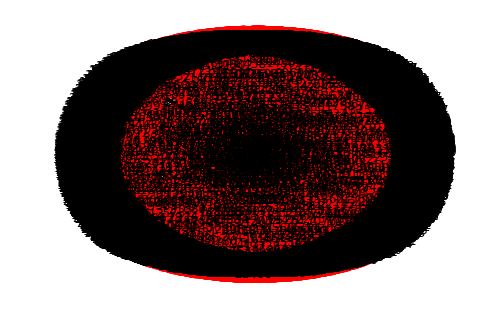

In [102]:
nx.draw(recipe_graph,with_labels=1)
plt.show()

In [9]:
recipe_graph = nx.algorithms.bipartite.projection.projected_graph(G,r,multigraph=True)

In [10]:
nx.write_edgelist(recipe_graph,'projection_recipe_graph')

In [11]:
p_one = nx.read_edgelist("ten_projection_user_graph")

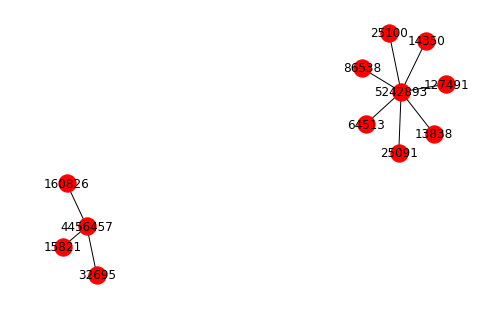

In [12]:
nx.draw(p_one,with_labels=1)
plt.show()

In [13]:
p_two = nx.read_edgelist("ten_projection_recipe_graph")

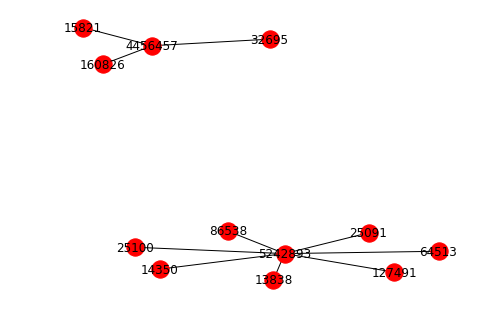

In [14]:
nx.draw(p_one,with_labels=1)
plt.show()

In [13]:
recipe_graph = nx.algorithms.bipartite.projection.weighted_projected_graph(G,r,ratio=False)

In [14]:
nx.write_edgelist(recipe_graph,'try_projection_recipe_graph')

In [15]:
p_2=nx.read_edgelist("ten_try_projection_recipe_graph")

{('7492', '6784'): Text(-0.397768,0.304301,'1'),
 ('7492', '46595'): Text(0.49906,-0.0100553,'1'),
 ('7492', '15880'): Text(0.414371,0.287176,'1'),
 ('7492', '24329'): Text(0.144127,-0.476797,'1'),
 ('7492', '7178'): Text(-0.499354,0.012785,'1'),
 ('7492', '133128'): Text(0.400315,-0.302534,'1'),
 ('7492', '87563'): Text(0.166959,0.474451,'1'),
 ('7492', '53517'): Text(-0.142857,0.480676,'1'),
 ('7492', '18830'): Text(-0.413694,-0.285643,'1'),
 ('7492', '17683'): Text(-0.165346,-0.472868,'1')}

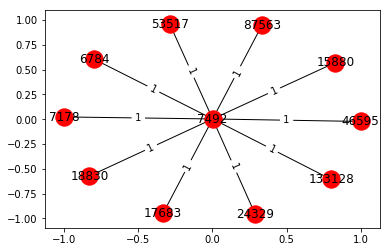

In [16]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(p_2) 
nx.draw_networkx(p_2,pos)
labels = nx.get_edge_attributes(p_2,'weight')
nx.draw_networkx_edge_labels(p_2,pos,edge_labels=labels)